<a href="https://colab.research.google.com/github/KurniaKhaikal/Corel-CBIR/blob/main/ImageSearchEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EKSTRAKSI FITUR

In [ ]:
import os
import json
import h5py
from PIL import Image
from imutils import paths
from google.colab import drive
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import cv2

In [ ]:
drive.mount('/content/drive')
base_dataset = "/content/drive/MyDrive/dataset/training_set"
base_dataset2 = "/content/drive/MyDrive/dataset2"
class_dir = ['beaches', 'bus', 'dinosaurs',
             'elephants', 'flowers', 'foods',
             'horses', 'monuments', 'mountains_and_snow','peolpe_and_villages_in_Africa'
             ]
IMAGE_SIZE = (224, 224)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_test = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset2, 'training_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_test.append(os.path.join(cur_dir, file))

In [ ]:
test_images = []
for image_path in dataset_test:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        test_images.append(image)
test_x = np.array(test_images).astype("float32") / 255.0

In [ ]:
class fungsiVGG16:
    def __init__(self):
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))

    def ekstrasi_fitur(self, img_path):
            img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)
            fitur = self.model.predict(img)
            normalisasi_fitur = fitur[0]/LA.norm(fitur[0])
            return normalisasi_fitur
            
def img_training(path):
        return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

features2 = []
names = []

model = fungsiVGG16()
list_training = img_training(base_dataset)
for i, img_path in enumerate(list_training):
        fitur_training = model.ekstrasi_fitur(img_path)
        nama_img = os.path.split(img_path)[1]
        features2.append(fitur_training)
        names.append(nama_img)
        print("Ekstraksi Fitur data Training No. %d , Dari Total %d" %((i+1), len(list_training)))
feature = np.array(features2)
print("Training:", len(feature))

Ekstraksi Fitur data Training No. 1 , Dari Total 900
Ekstraksi Fitur data Training No. 2 , Dari Total 900
Ekstraksi Fitur data Training No. 3 , Dari Total 900
Ekstraksi Fitur data Training No. 4 , Dari Total 900
Ekstraksi Fitur data Training No. 5 , Dari Total 900
Ekstraksi Fitur data Training No. 6 , Dari Total 900
Ekstraksi Fitur data Training No. 7 , Dari Total 900
Ekstraksi Fitur data Training No. 8 , Dari Total 900
Ekstraksi Fitur data Training No. 9 , Dari Total 900
Ekstraksi Fitur data Training No. 10 , Dari Total 900
Ekstraksi Fitur data Training No. 11 , Dari Total 900
Ekstraksi Fitur data Training No. 12 , Dari Total 900
Ekstraksi Fitur data Training No. 13 , Dari Total 900
Ekstraksi Fitur data Training No. 14 , Dari Total 900
Ekstraksi Fitur data Training No. 15 , Dari Total 900
Ekstraksi Fitur data Training No. 16 , Dari Total 900
Ekstraksi Fitur data Training No. 17 , Dari Total 900
Ekstraksi Fitur data Training No. 18 , Dari Total 900
Ekstraksi Fitur data Training No. 19 

In [ ]:
output = "dataset.h5"
h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data = features)
h5f.create_dataset('dataset_2', data = np.string_(names))
print(output)
h5f.close()

dataset.h5


In [ ]:
h5f = h5py.File(output,'r')
# feats = h5f['dataset_1'][:]
features = h5f['dataset_1'][:]
print(features)
imgNames = h5f['dataset_2'][:]
print(imgNames)
h5f.close()

[[0.01916352 0.04952965 0.01147751 ... 0.05875333 0.02514587 0.        ]
 [0.         0.         0.         ... 0.         0.03941042 0.02915227]
 [0.         0.00750262 0.00712089 ... 0.         0.12647185 0.        ]
 ...
 [0.         0.04383806 0.04137463 ... 0.08463588 0.01337787 0.04304476]
 [0.03227431 0.00463194 0.11605678 ... 0.         0.02810591 0.18201944]
 [0.04581672 0.         0.1104266  ... 0.03010923 0.01592268 0.06279171]]
[b'467.jpg' b'390.jpg' b'178.jpg' b'337.jpg' b'460.jpg' b'426.jpg'
 b'316.jpg' b'484.jpg' b'389.jpg' b'448.jpg' b'491.jpg' b'124.jpg'
 b'133.jpg' b'458.jpg' b'353.jpg' b'359.jpg' b'437.jpg' b'331.jpg'
 b'117.jpg' b'167.jpg' b'332.jpg' b'162.jpg' b'358.jpg' b'461.jpg'
 b'421.jpg' b'154.jpg' b'391.jpg' b'125.jpg' b'520.jpg' b'127.jpg'
 b'417.jpg' b'350.jpg' b'475.jpg' b'368.jpg' b'349.jpg' b'317.jpg'
 b'174.jpg' b'463.jpg' b'519.jpg' b'457.jpg' b'439.jpg' b'362.jpg'
 b'499.jpg' b'145.jpg' b'192.jpg' b'420.jpg' b'128.jpg' b'324.jpg'
 b'188.jpg' b'168.jp

RETRIEVAL

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from tensorflow.keras.applications import VGG16
import copy
import json
import sklearn.metrics as metric
from tensorflow.keras.models import Model
import pandas as pd
import matplotlib.image as mpimg


In [ ]:
def euclidean(a, b):
	return np.linalg.norm(a - b)

In [ ]:
def perform_search(query_features, indexed_train, max_results=12):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

In [ ]:
dataset_test2 = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset2, 'test_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_test2.append(os.path.join(cur_dir, file))

In [ ]:
print("len to retrieving:", len(dataset_test2))

len to retrieving: 100


In [ ]:
test_images2 = []
for image_path in dataset_test2:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        test_images2.append(image)
print("[INFO] normalization...")
test_x2 = np.array(test_images2).astype("float32") / 255.0

[INFO] normalization...


In [ ]:
modelVGG16 = VGG16(weights="imagenet")
model = Model(inputs=modelVGG16.input, outputs=modelVGG16.get_layer("fc1").output)
model.summary()

In [ ]:
features = model.predict(test_x)

In [ ]:
with open('/content/drive/MyDrive/dataset2/feature_extraction1.json') as f:
  training_indexed = json.load(f)

In [ ]:
query_indexes = list(range(0, test_x2.shape[0]))
label_builder = list(np.unique(training_indexed["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}
recalls = copy.deepcopy(class_builder)
precisions = copy.deepcopy(class_builder)
# loop over the testing indexes
for i in query_indexes:
    queryFeatures = features[i]
    results = perform_search(queryFeatures, training_indexed, max_results=12)
    labels_ret = [training_indexed["labels"][r[1]] for r in results]
    label_true = dataset_test[i].split("/")[7]
    label_trues = [label_true for _ in labels_ret]
    recall = metric.recall_score(label_trues, labels_ret, average='weighted')
    precision = metric.precision_score(label_trues, labels_ret, average='weighted')
    recalls[label_true].append(recall)
    precisions[label_true].append(precision)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defi

Nilai Recall:
110.jpg 0.08333333333333333
111.jpg 0.0
112.jpg 0.08333333333333333
113.jpg 0.0
114.jpg 0.0
115.jpg 0.0
116.jpg 0.08333333333333333
117.jpg 0.08333333333333333
118.jpg 0.0
119.jpg 0.0
250.jpg 0.0
251.jpg 0.0
252.jpg 0.08333333333333333
253.jpg 0.0
254.jpg 0.0
255.jpg 0.0
256.jpg 0.0
257.jpg 0.08333333333333333
258.jpg 0.08333333333333333
259.jpg 0.08333333333333333
310.jpg 0.08333333333333333
311.jpg 0.08333333333333333
312.jpg 0.08333333333333333
313.jpg 0.08333333333333333
314.jpg 0.08333333333333333
315.jpg 0.08333333333333333
316.jpg 0.08333333333333333
317.jpg 0.08333333333333333
318.jpg 0.08333333333333333
319.jpg 0.08333333333333333
450.jpg 0.08333333333333333
451.jpg 0.08333333333333333
452.jpg 0.08333333333333333
453.jpg 0.08333333333333333
454.jpg 0.08333333333333333
455.jpg 0.08333333333333333
456.jpg 0.08333333333333333
457.jpg 0.08333333333333333
458.jpg 0.08333333333333333
459.jpg 0.08333333333333333
50.jpg 0.0
51.jpg 0.0
52.jpg 0.08333333333333333
53.jpg 0.

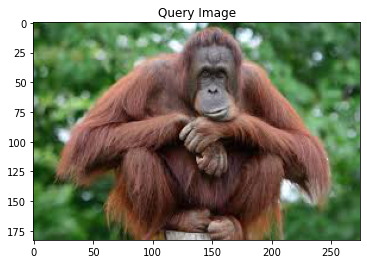

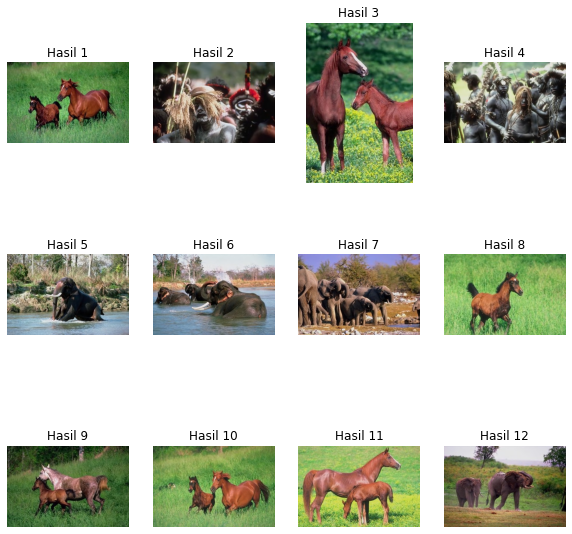

In [ ]:
print("Nilai Recall:")
comb_recall, comb_precision = [], []
for key in recalls.keys():
    average_val = np.average(recalls[key])
    print(key, average_val)
    comb_recall.append(average_val)
print("Nilai Rerata Recall", np.average(comb_recall))

print("\nNilai Presisi:")
for key in precisions.keys():
    average_val = np.average(precisions[key])
    print(key, average_val)
    comb_precision.append(average_val)
print("Nilai Rerata Presisi", np.average(comb_precision))
print("\n")

pathquery = "/content/drive/MyDrive/dataset/test_set/images.jpg"
img = mpimg.imread(pathquery)
plt.title("Query Image")
plt.imshow(img)
plt.show()

model = fungsiVGG16()
fitur_query = model.ekstrasi_fitur(pathquery)
scores = np.dot(fitur_query, feature.T)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]

max_hasil = 12
hasil = [imgNames[index] for i,index in enumerate(rank_ID[0:max_hasil])]
print(" ")
fig = plt.figure(figsize=(10, 10))

for i,im in enumerate(hasil):
    fig.add_subplot(3, 4, i+1)
    plt.axis('off')
    plt.subplots_adjust(wspace=None, hspace=None)
    img_result = mpimg.imread(base_dataset+"/"+str(im, 'utf-8'))
    plt.title("Hasil %d" %(i+1))
    plt.imshow(img_result)
